#IMPORTING THE LIBRARIES REQUIRED

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LOADING THE DATA AND PRE-PROCESSING

In [3]:
df=pd.read_csv('D:\Titanic-Dataset.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


HANDLING MISSING VALUES

In [7]:
#counting the number of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#since cabin has most of the null values we can drop it
df=df.drop(['Cabin'],axis=1)

In [9]:
#filling the missing values in age with mean values
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
#now filling the embarked column with the mode
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df['Embarked'].fillna('S',inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA ANALYSIS

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

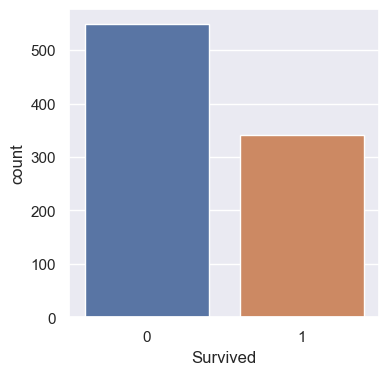

In [15]:
#count plot for it 
sns.set()
plt.figure(figsize=(4,4))  #adjusting size
sns.countplot(x='Survived', data=df)
plt.show()

In [16]:
#comparing  count of passengers based on sex
b=df['Sex'].value_counts()
b

Sex
male      577
female    314
Name: count, dtype: int64

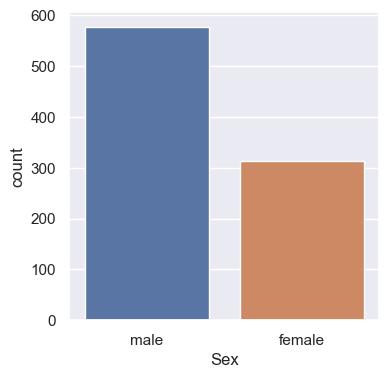

In [17]:
sns.set()
plt.figure(figsize=(4,4))
sns.countplot(x='Sex',data=df)
plt.show()   #it indicates more number of male passengers were on titanic

In [18]:
a=df.groupby('Sex')['Survived'].sum()
a

Sex
female    233
male      109
Name: Survived, dtype: int64

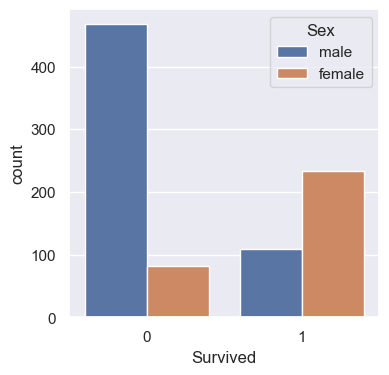

In [19]:
sns.set()
plt.figure(figsize=(4,4))
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

In [20]:
male_survival_rate = ((b['male'] - a['male']) / b['male']) * 100
female_survival_rate = ((b['female'] - a['female']) / b['female']) * 100
print("Survival rate for male passengers: {:.2f}%".format(male_survival_rate))
print("Survival rate for female passengers: {:.2f}%".format(female_survival_rate))

Survival rate for male passengers: 81.11%
Survival rate for female passengers: 25.80%


CONVERTING CATEGORICAL VALUES INTO NUMERICAL

In [21]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [22]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [23]:
#separating data into features and target
X=df.drop(['PassengerId','Survived','Ticket','Name'],axis=1)
Y=df['Survived']

In [24]:
#splitting data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
X_train.shape,X_test.shape

((712, 7), (179, 7))

In [26]:
Y_train.shape,Y_test.shape

((712,), (179,))

In [27]:
#model training---LOGISTIC REGRESSION(since categorical prediction we require whether survived or not)
#solver='lbfgs' specifies the optimization algorithm to use
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [28]:
#evaluating model on training data
X_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train,X_train_pred)
train_accuracy*100

80.19662921348315

In [39]:
X_train_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [40]:
#model evaluation on testing data
X_test_pred=model.predict(X_test)
testingaccuracy=accuracy_score(Y_test,X_test_pred)
testingaccuracy*100

79.88826815642457